In [18]:
## 1. Comprensión del negocio

# ¿Qué problema queremos resolver?
# Investigar si existe una correlación entre el tiempo en pantalla y variables asociadas a la salud mental (estrés, ansiedad, depresión).

# ¿Quiénes se beneficiarían?
# Instituciones educativas, padres, psicólogos, entidades de salud pública.

# ¿Qué preguntas queremos responder?
# ¿Cuánto tiempo frente a pantallas se considera perjudicial?
# ¿Qué tipo de uso (ocio, trabajo, redes sociales) impacta más?

In [19]:
#imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
## 2. Comprensión de los datos
##2.1 Carga de datos y limpieza de datos

# Carga del dataset
df = pd.read_csv('/home/marast/Documentos/1UNIVALLE/7 SEMESTRE/ICD/Impact-of-Screen-Time-on-Mental-Health/data/digital_diet_mental_health.csv')




In [21]:
display(df.head(5))
print(df.info())
print(df.describe())
print("\n", df.shape)

,user_id,age,gender,daily_screen_time_hours,phone_usage_hours,laptop_usage_hours,tablet_usage_hours,tv_usage_hours,social_media_hours,work_related_hours,...,stress_level,physical_activity_hours_per_week,location_type,mental_health_score,uses_wellness_apps,eats_healthy,caffeine_intake_mg_per_day,weekly_anxiety_score,weekly_depression_score,mindfulness_minutes_per_day
0,user_1,51,Female,4.8,3.4,1.3,1.6,1.6,4.1,2.0,...,10,0.7,Urban,32,1,1,125.2,13,15,4.0
1,user_2,64,Male,3.9,3.5,1.8,0.9,2.0,2.7,3.1,...,6,4.3,Suburban,75,0,1,150.4,19,18,6.5
2,user_3,41,Other,10.5,2.1,2.6,0.7,2.2,3.0,2.8,...,5,3.1,Suburban,22,0,0,187.9,7,3,6.9
3,user_4,27,Other,8.8,0.0,0.0,0.7,2.5,3.3,1.6,...,5,0.0,Rural,22,0,1,73.6,7,2,4.8
4,user_5,55,Male,5.9,1.7,1.1,1.5,1.6,1.1,3.6,...,7,3.0,Urban,64,1,1,217.5,8,10,0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 25 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   user_id                           2000 non-null   object 
 1   age                               2000 non-null   int64  
 2   gender                            2000 non-null   object 
 3   daily_screen_time_hours           2000 non-null   float64
 4   phone_usage_hours                 2000 non-null   float64
 5   laptop_usage_hours                2000 non-null   float64
 6   tablet_usage_hours                2000 non-null   float64
 7   tv_usage_hours                    2000 non-null   float64
 8   social_media_hours                2000 non-null   float64
 9   work_related_hours                2000 non-null   float64
 10  entertainment_hours               2000 non-null   float64
 11  gaming_hours                      2000 non-null   float64
 12  sleep_

<Axes: >

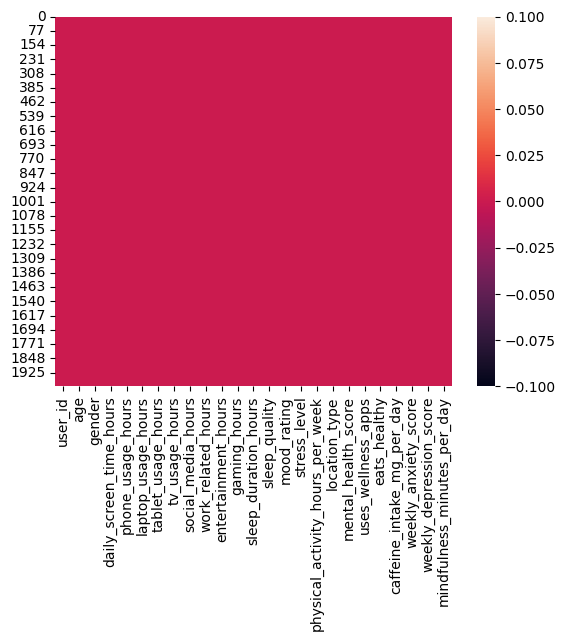

In [22]:
sns.heatmap(df.isnull())


In [23]:
##2.2. Análisis Descriptivo


In [24]:
##2.2.1 Analisis Strings

In [25]:
df.select_dtypes('object').columns


Index(['user_id', 'gender', 'location_type'], dtype='object')

location_type
Urban       999
Suburban    605
Rural       396
Name: count, dtype: int64


/tmp/ipykernel_7794/3859410590.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='location_type', data=df, palette='flare')


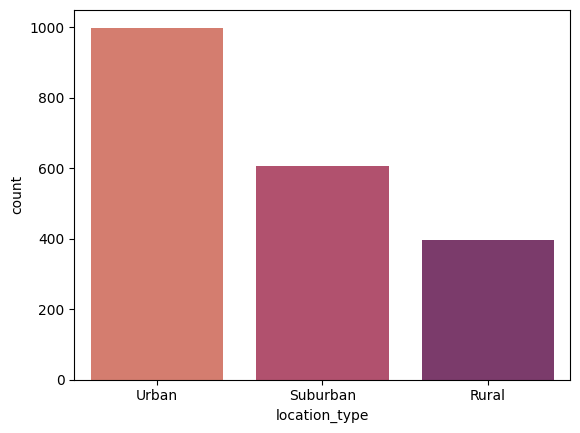

In [26]:
print(df['location_type'].value_counts())
sns.countplot(x='location_type', data=df, palette='flare')  
plt.show()

In [27]:
#Numbers

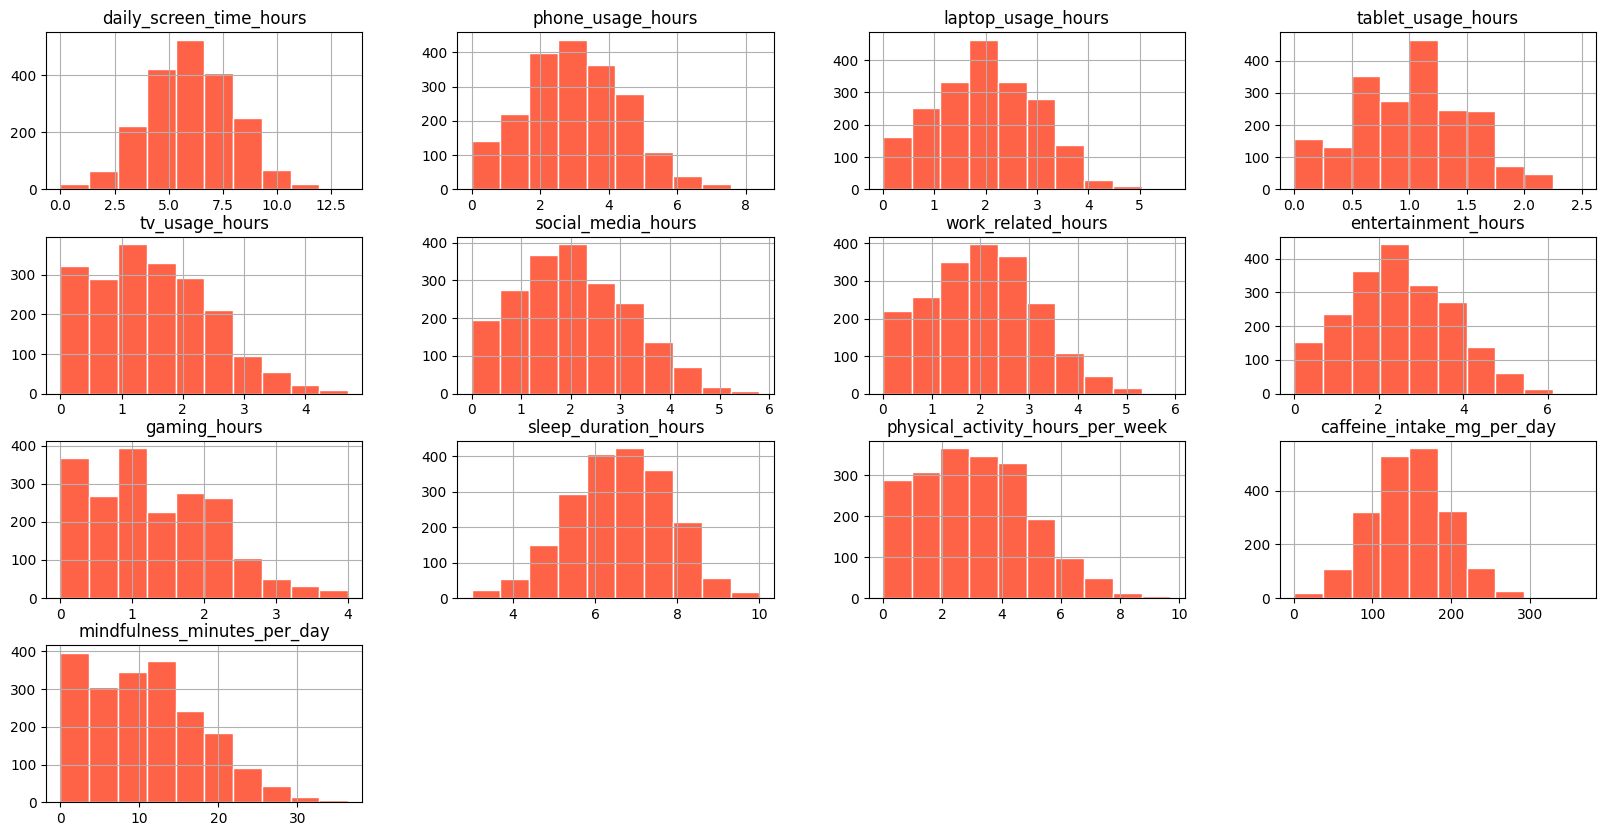

,daily_screen_time_hours,phone_usage_hours,laptop_usage_hours,tablet_usage_hours,tv_usage_hours,social_media_hours,work_related_hours,entertainment_hours,gaming_hours,sleep_duration_hours,physical_activity_hours_per_week,caffeine_intake_mg_per_day,mindfulness_minutes_per_day
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.0000,2000.000000,2000.000000,2000.00000,2000.000000
mean,6.025600,3.023700,1.999950,0.995650,1.503700,2.039200,2.010250,2.46735,1.2795,6.537550,3.087150,148.07970,10.753750
std,1.974123,1.449399,0.997949,0.492714,0.959003,1.133435,1.116111,1.23686,0.8945,1.203856,1.885258,48.86066,7.340269
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0000,3.000000,0.000000,0.80000,0.000000
25%,4.700000,2.000000,1.300000,0.600000,0.800000,1.200000,1.200000,1.60000,0.6000,5.700000,1.600000,113.90000,4.900000
50%,6.000000,3.000000,2.000000,1.000000,1.500000,2.000000,2.000000,2.40000,1.2000,6.600000,3.000000,147.45000,10.400000
75%,7.325000,4.000000,2.700000,1.300000,2.200000,2.800000,2.800000,3.30000,1.9000,7.400000,4.400000,180.70000,15.800000
max,13.300000,8.400000,5.600000,2.500000,4.700000,5.800000,5.900000,6.80000,4.0000,10.000000,9.700000,364.90000,36.400000


In [28]:
numbers=df.select_dtypes('float64', 'int64').columns
df[numbers].hist(figsize=(20,10), color='#FF6347', edgecolor='white')

plt.show()
display(df[numbers].describe())

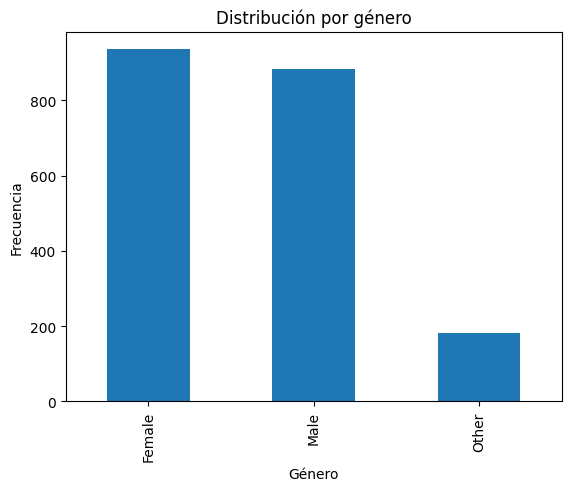

In [29]:
# Gráfica de barras para género
df['gender'].value_counts().plot(kind='bar')
plt.title('Distribución por género')
plt.xlabel('Género')
plt.ylabel('Frecuencia')
plt.show()

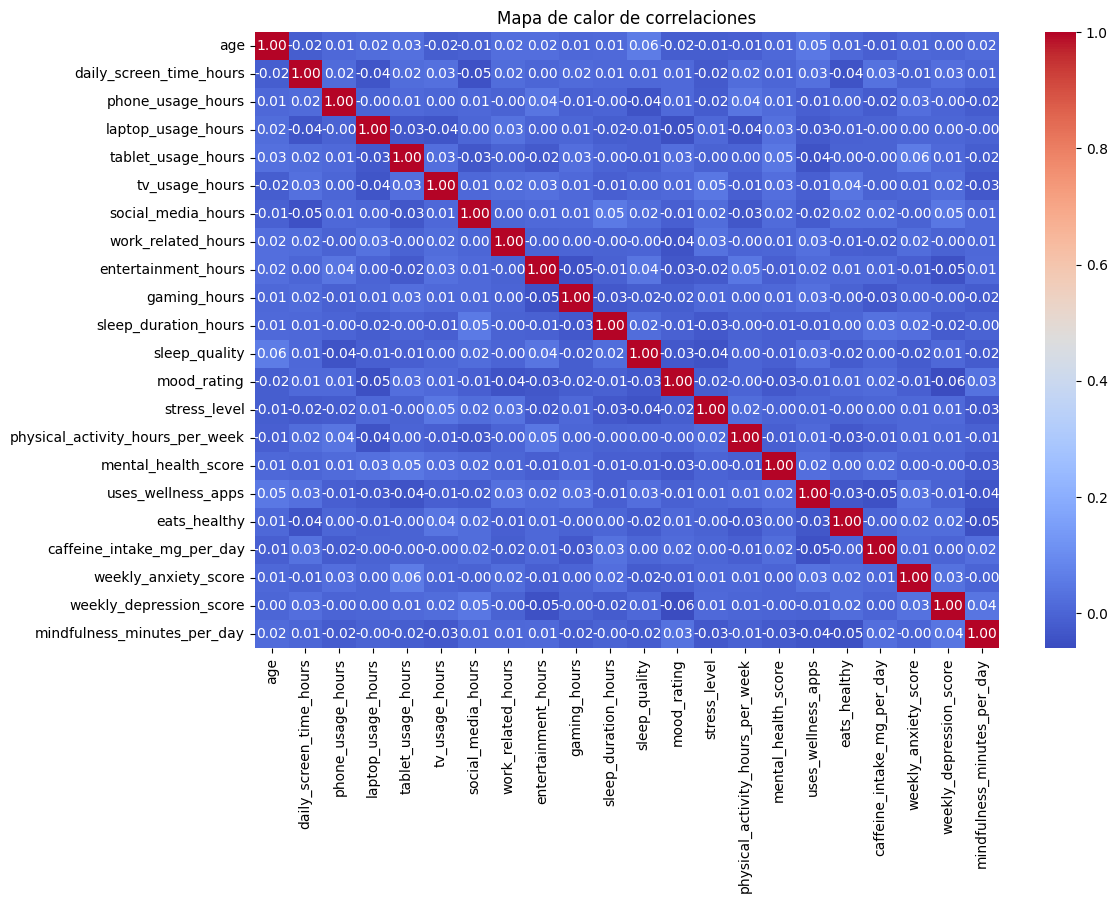

In [31]:
#Correlación solo entre variables numéricas
plt.figure(figsize=(12,8))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Mapa de calor de correlaciones')
plt.show()

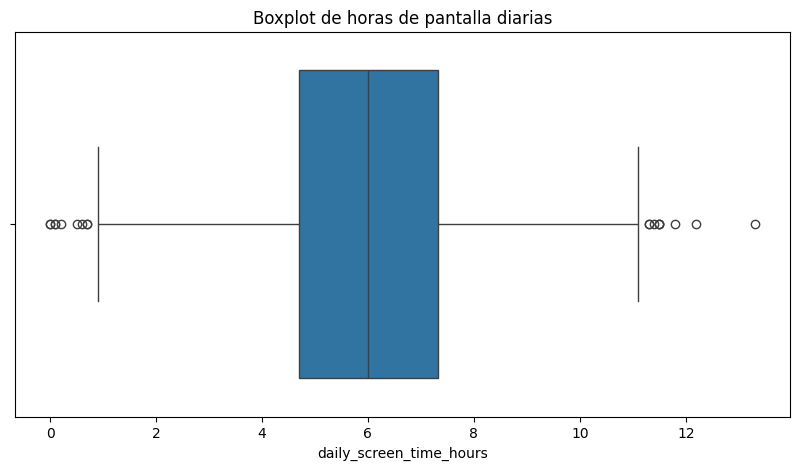

In [32]:
#Boxplot para outliers
plt.figure(figsize=(10,5))
sns.boxplot(x=df['daily_screen_time_hours'])
plt.title('Boxplot de horas de pantalla diarias')
plt.show()